In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Assuming 'Wine.QT.csv' is located in the same directory as your Jupyter Notebook
data = pd.read_csv('WineQT.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Check for missing values
data.isnull().sum()

# Drop any rows with missing values
data = data.dropna()

# Assuming you only want to use a subset of features for clustering
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/refilwemaleka/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/refilwemaleka/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/refilwemaleka/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/refilwemaleka/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

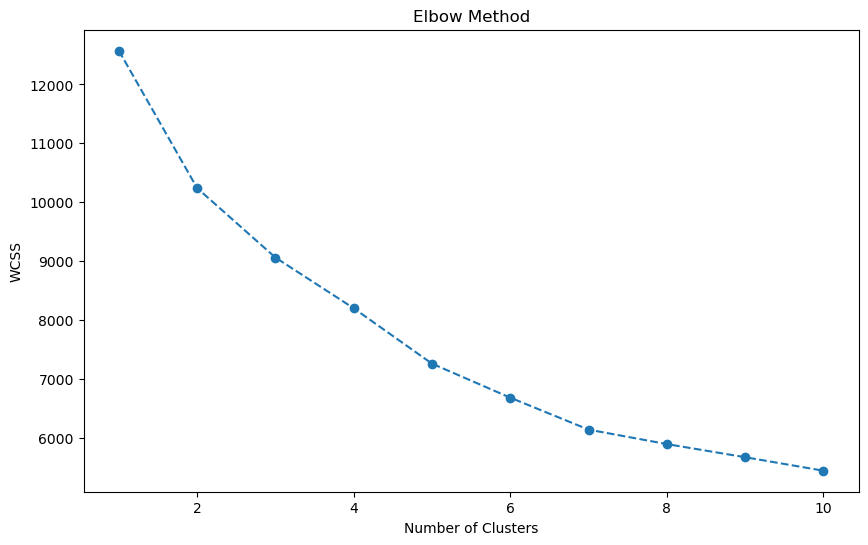

In [5]:
# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) for different numbers of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Based on the elbow method, choose the optimal number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

/Users/refilwemaleka/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


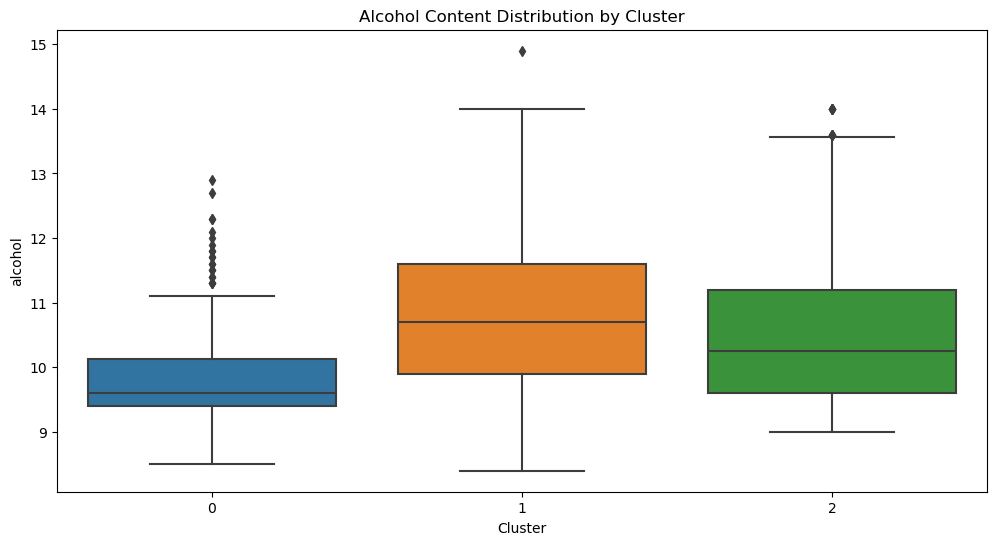

In [7]:
# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').mean()

# Visualize the characteristics of each cluster (e.g., using box plots or bar plots)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='alcohol', data=data)
plt.title('Alcohol Content Distribution by Cluster')
plt.show()

# Repeat visualization for other features as needed

# Interpretation of the Distribution Chart:
# Cluster Comparison: The distribution chart compares the alcohol content across different clusters identified through K-means clustering.
# Cluster Characteristics: Each cluster represents a group of customers with similar characteristics in terms of their purchase behavior, as captured by the features used for clustering (e.g., fixed acidity, volatile acidity, citric acid, etc.).The chart allows us to observe how the alcohol content varies within each cluster.

# Observations:
# Cluster Centers: The center of each box in the box plot represents the median alcohol content of customers within that cluster.
# Interquartile Range (IQR): The box plot displays the IQR, which indicates the spread of alcohol content values within each cluster.
# Outliers: Any points outside the whiskers of the box plot are considered outliers and may represent customers with unusual alcohol content preferences within their respective clusters.

# Insights:
# Cluster Separation: If there is clear separation between the clusters in terms of alcohol content, it suggests that alcohol content might be a significant factor in distinguishing customer segments.
# Targeted Marketing Strategies: Based on the characteristics of each cluster, such as their alcohol content preferences, marketers can tailor their marketing strategies to better meet the needs and preferences of each segment.
# Product Recommendations: Understanding the alcohol content preferences of different customer segments can help in recommending specific products or promotions to each group.
# Customer Engagement: Marketers can use this information to engage with customers more effectively, such as by offering personalized recommendations or targeted advertising campaigns.


# Cluster 0: customers in this cluster prefer wines with higher alcohol content and lower acidity levels.This segment may include enthusiasts of full-bodied wines with richer flavors. They might prefer wines with higher alcohol content for their boldness and depth of flavor.
# Cluster 1: customers in this cluster have a preference for wines with moderate alcohol content and balanced acidity. This segment may represent individuals who appreciate well-balanced wines with harmonious flavors. They might enjoy wines that pair well with a variety of foods and occasions.
# Cluster 2:customers in this cluster show a preference for wines with lower alcohol content and higher acidity. This segment may include connoisseurs who prefer wines with higher acidity levels for their freshness and crispness. They might seek out wines that are more refreshing and light-bodied.

# Recommendations: tailor marketing campaigns to each cluster's preferences, emphasizing the unique characteristics of the wines they prefer. Offer personalized product recommendations based on each cluster's preferences, guiding customers to wines that align with their tastes. Create targeted promotions and discounts for specific wine types or styles favored by each cluster to encourage purchases.

# Conclusion: customer segmentation through K-means clustering provides valuable insights into distinct preferences within the customer base. By leveraging these insights, businesses can develop targeted marketing strategies that resonate with each segment. Understanding the nuances of customer preferences allows businesses to engage with customers more effectively, fostering loyalty and satisfaction. Implementing segmentation-driven strategies can lead to increased sales, improved customer retention, and overall business growth